In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os 
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def CreateDataFrame(dir):
    image_paths = []
    labels = []
    for  label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed!")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'],train['label'] = CreateDataFrame(TRAIN_DIR) 

.ipynb_checkpoints completed!
angry completed!
disgust completed!
fear completed!
happy completed!
neutral completed!
sad completed!
surprise completed!


In [5]:
test = pd.DataFrame()
test['image'],test['label'] = CreateDataFrame(TEST_DIR) 

.ipynb_checkpoints completed!
angry completed!
disgust completed!
fear completed!
happy completed!
neutral completed!
sad completed!
surprise completed!


In [6]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
6701  images/test\surprise\9806.jpg  surprise
6702  images/test\surprise\9830.jpg  surprise
6703  images/test\surprise\9853.jpg  surprise
6704  images/test\surprise\9878.jpg  surprise
6705   images/test\surprise\993.jpg  surprise

[6706 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
6701    images/test\surprise\9806.jpg
6702    images/test\surprise\9830.jpg
6703    images/test\surprise\9853.jpg
6704    images/test\surprise\9878.jpg
6705     images/test\surprise\993.jpg
Name:

In [7]:
from tqdm.notebook import tqdm

In [8]:
def extract_features(images):
    features = [] 
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [9]:
test['image'] = test['image'].apply(lambda x: x if '.ipynb_checkpoints' not in x else None)
test = test.dropna(subset=['image'])

In [10]:
test_features = extract_features(test['image'])

  0%|          | 0/6703 [00:00<?, ?it/s]

C:\Users\mrrpa\anaconda3\Real Anaconda\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/10915 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
#Supervised learning
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test =le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
#Convulation Layers
model.add(Conv2D(128,kernel_size = (3,3), activation = 'relu',input_shape = (48,48,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
#Fully connected layers
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(7,activation='softmax'))

C:\Users\mrrpa\anaconda3\Real Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=x_train, y=y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

In [ ]:
# Save the model architecture to JSON
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save the full model including weights
model.save("emotiondetector.h5")

print("Model architecture saved as emotiondetector.json and full model saved as emotiondetector.h5")


In [19]:
from keras.models import model_from_json

In [20]:
# Load the model architecture from JSON
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()

# Create the model from the JSON string
model = model_from_json(model_json)

# Load the weights into the model
model.load_weights("emotiondetector.h5")

In [21]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [22]:
def ef(image):
    img = load_img(image,grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [28]:
import matplotlib.pyplot as plt
%matplot inline

UsageError: Line magic function `%matplot` not found.


C:\Users\mrrpa\anaconda3\Real Anaconda\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Original Image Is Of Angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model Prediction Is:  sad


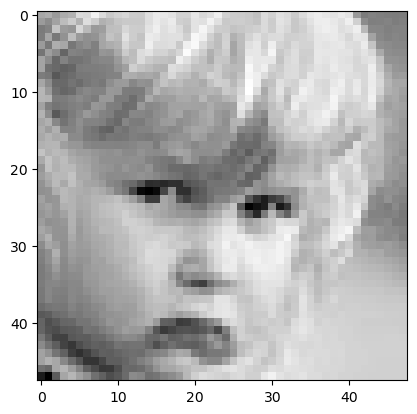

In [29]:
#TO TEST
image = 'images/train/sad/10028.jpg'
print("Original Image Is Of Angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model Prediction Is: ",pred_label)
plt.imshow(img.reshape(48,48),cmap = 'gray')